In [1]:
%time

import pandas as pd
import numpy as np
plt.style.use('ggplot')
import plotly_express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import palettable
from datetime import date, timedelta

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


In [2]:
def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
          "marker": {'colors': colors},
          "textinfo":"percent+label+value",
          "textfont": {'color': '#FFFFFF', 'size': 10},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 25,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig


In [3]:
traindf_large = pd.DataFrame(pd.read_csv('Train_expanded.csv'))
traindf_large.set_index('Reported_Time', inplace = True)

In [4]:
traindf_large.head()

1       2       3       4       5       6  \
Reported_Time                                                                
2019-03-19-00_00_00.050000  0.1608  0.1059  0.3608  0.5765  0.5961  0.5647   
2019-03-19-00_00_01.050000  0.2745  0.2392  0.1686  0.2471  0.3686  0.2784   
2019-03-19-00_00_02.050000  0.1059  0.4157  0.2235  0.1686  0.1412  0.1725   
2019-03-19-00_00_03.050000  0.2314  0.2039  0.1804  0.1804  0.3765  0.3294   
2019-03-19-00_00_04.050000  0.7020  0.5294  0.6824  0.7490  0.5451  0.7961   

                                 7       8       9      10  ...   23032  \
Reported_Time                                               ...           
2019-03-19-00_00_00.050000  0.5882  0.5647  0.5922  0.5804  ...  0.1412   
2019-03-19-00_00_01.050000  0.4588  0.2078  0.1647  0.1922  ...  0.1765   
2019-03-19-00_00_02.050000  0.1529  0.1412  0.1412  0.1294  ...  0.1529   
2019-03-19-00_00_03.050000  0.3176  0.4353  0.3294  0.2471  ...  0.1608   
2019-03-19-00_00_04.050000  0.8588  0.7843  0.8275  0.8588  ...  0.1922   

                             23033   23034   23035   23036   23037   23038  \
Reported_Time                                                                
2019-03-19-00_00_00.050000  0.1451  0.1647  0.1647  0.1608  0.1569  0.1647   
2019-03-19-00_00_01.050000  0.1804  0.2392  0.1961  0.1882  0.1882  0.1961   
2019-03-19-00_00_02.050000  0.1529  0.2118  0.1647  0.1725  0.1686  0.1725   
2019-03-19-00_00_03.050000  0.1686  0.1765  0.1765  0.1765  0.1765  0.1804   
2019-03-19-00_00_04.050000  0.2157  0.2510  0.2000  0.2039  0.2039  0.2039   

                             23039   23040  Label  
Reported_Time                                      
2019-03-19-00_00_00.050000  0.1647  0.1686      1  
2019-03-19-00_00_01.050000  0.2000  0.2039      1  
2019-03-19-00_00_02.050000  0.1725  0.1765      1  
2019-03-19-00_00_03.050000  0.1804  0.1804      1  
2019-03-19-00_00_04.050000  0.2118  0.2118      1  

[5 rows x 23041 columns]

In [5]:
traindf_large.index = pd.to_datetime(traindf_large.index, format = '%Y-%m-%d-%H_%M_%S.%f')

In [6]:
traindf_large.head()

1       2       3       4       5       6  \
Reported_Time                                                             
2019-03-19 00:00:00.050  0.1608  0.1059  0.3608  0.5765  0.5961  0.5647   
2019-03-19 00:00:01.050  0.2745  0.2392  0.1686  0.2471  0.3686  0.2784   
2019-03-19 00:00:02.050  0.1059  0.4157  0.2235  0.1686  0.1412  0.1725   
2019-03-19 00:00:03.050  0.2314  0.2039  0.1804  0.1804  0.3765  0.3294   
2019-03-19 00:00:04.050  0.7020  0.5294  0.6824  0.7490  0.5451  0.7961   

                              7       8       9      10  ...   23032   23033  \
Reported_Time                                            ...                   
2019-03-19 00:00:00.050  0.5882  0.5647  0.5922  0.5804  ...  0.1412  0.1451   
2019-03-19 00:00:01.050  0.4588  0.2078  0.1647  0.1922  ...  0.1765  0.1804   
2019-03-19 00:00:02.050  0.1529  0.1412  0.1412  0.1294  ...  0.1529  0.1529   
2019-03-19 00:00:03.050  0.3176  0.4353  0.3294  0.2471  ...  0.1608  0.1686   
2019-03-19 00:00:04.050  0.8588  0.7843  0.8275  0.8588  ...  0.1922  0.2157   

                          23034   23035   23036   23037   23038   23039  \
Reported_Time                                                             
2019-03-19 00:00:00.050  0.1647  0.1647  0.1608  0.1569  0.1647  0.1647   
2019-03-19 00:00:01.050  0.2392  0.1961  0.1882  0.1882  0.1961  0.2000   
2019-03-19 00:00:02.050  0.2118  0.1647  0.1725  0.1686  0.1725  0.1725   
2019-03-19 00:00:03.050  0.1765  0.1765  0.1765  0.1765  0.1804  0.1804   
2019-03-19 00:00:04.050  0.2510  0.2000  0.2039  0.2039  0.2039  0.2118   

                          23040  Label  
Reported_Time                           
2019-03-19 00:00:00.050  0.1686      1  
2019-03-19 00:00:01.050  0.2039      1  
2019-03-19 00:00:02.050  0.1765      1  
2019-03-19 00:00:03.050  0.1804      1  
2019-03-19 00:00:04.050  0.2118      1  

[5 rows x 23041 columns]

### Getting the number of days for the data:

In [7]:
import datetime

In [8]:
label_df = pd.DataFrame(traindf_large.Label)
label_df = label_df.reset_index()


In [9]:
start_date =  [datetime.datetime.date(d) for d in traindf_large.index]
df = pd.DataFrame(start_date)
df = pd.merge(df, label_df, left_index=True, right_index=True)
df.columns = ['Dates', 'Reported_Time', 'Label']
df.drop('Reported_Time', inplace=True, axis=1)
df.set_index("Dates", inplace=True, drop=True)


In [12]:
palettable.colorbrewer.qualitative.Dark2_6.hex_colors

['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02']

### Class Distribution:

In [13]:
value_counts = df.Label.value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#1B9E77', '#D95F02'], "Class Distribution"))

In [14]:
value_counts = df.index.value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02'], "Date Distribution"))

## Day Wise Class Distribution:

In [15]:
df_safe = df[df.Label==1]

In [16]:
value_counts = df_safe.index.value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02'], "Safe Dates Distribution"))

From this we can see that 
- **2019-04-29** has all safe vehicle moments
- **2019-03-19** has the most number of safe vehicle moments



In [17]:
df_unsafe = df[df.Label == -1]

In [18]:
value_counts = df_unsafe.index.value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts,['#1B9E77', '#D95F02', '#7570B3', '#E7298A', '#66A61E', '#E6AB02'], "Unsafe Dates Distribution"))


We can observe that 2019-03-25 has the least number of accidents

### Trying Sequential Split, 70:30

In [20]:
train_set, test_set= np.split(traindf_large, [int(.7 *len(traindf_large))])

In [19]:
train_set = traindf_large[traindf_large.index.day!=29]
test_set = traindf_large[traindf_large.index.day==29]

In [21]:
X_train, y_train = train_set.drop('Label', axis=1).values, train_set.Label
X_test, y_test = test_set.drop('Label', axis=1).values, test_set.Label

In [27]:
X_test = pd.DataFrame(X_test)

In [28]:

def run_model( model, alg_name, plot_index):
    model.fit(X_train, y_train)
    
    #make pred for test:
    y_pred = model.predict(X_test)
    
    #Calc Accuracy score:
    
    accuracy = accuracy_score(y_test, y_pred) *100 
    
    #Assigning colours for the values in y_test:
    
    color_code = {-1:'red', 1:'blue'}
    
    #addint subplots now for all the different graphs
    
    ax = fig.add_subplot(4,2, plot_index)
    colors = [color_code[i] for i in y_test]
    
    
    ax.scatter(X_test.iloc[:,0], X_test.iloc[:,3], color=colors, marker='.', label='Circle = Ground truth')
    
    colors = [color_code[x] for x in y_pred]
    
    
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:,3], color=colors, marker='o', facecolors='none', label='Dot = Prediction')

    ax.legend(loc="lower right")
    
    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')

    ax.set_title(alg_name + ". Accuracy: " + str(accuracy))

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



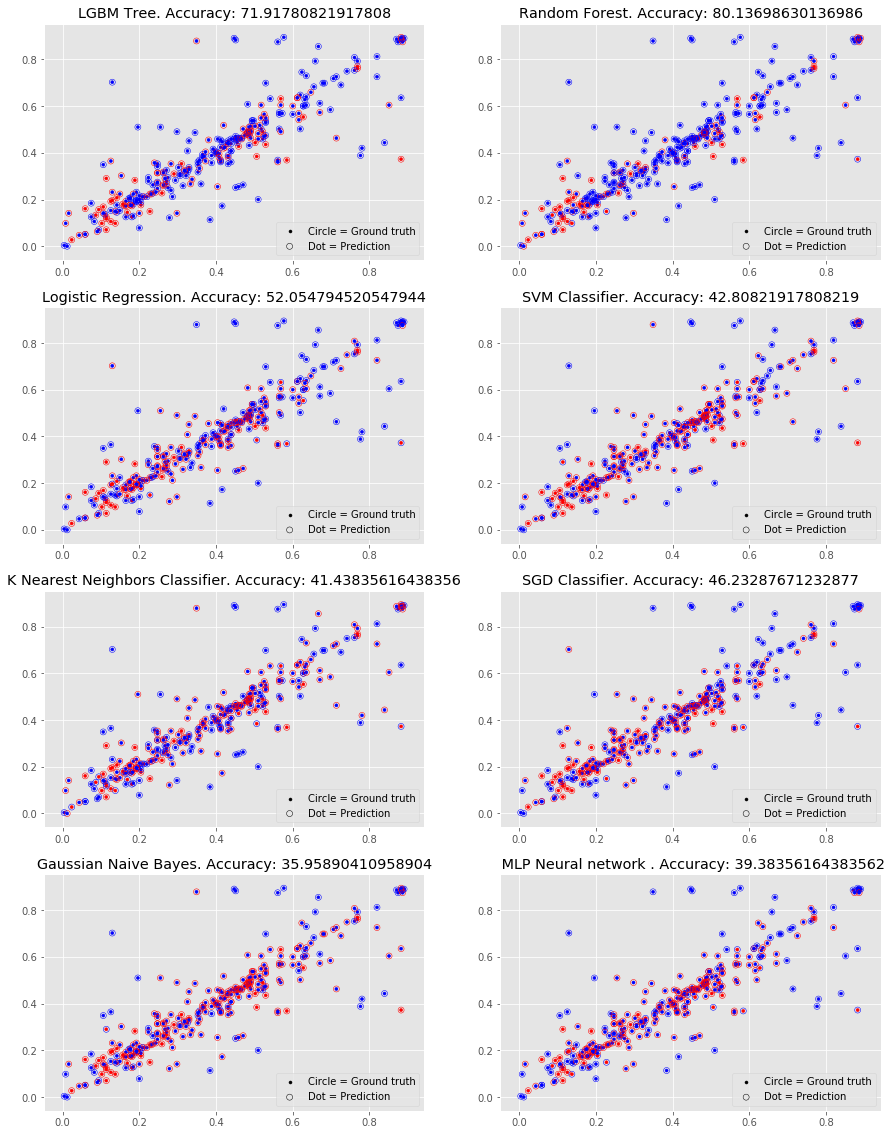

In [30]:
fig = plt.figure(figsize=(15,20))

#Decision Tree:

from lightgbm import LGBMClassifier

model = LGBMClassifier()
run_model(model, "LGBM Tree", 1)


# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=126)
run_model(model, "Random Forest", 2)

# ----- xgboost ------------


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
run_model(model, "Logistic Regression", 3)

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVM Classifier", 4)

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
run_model(model, "K Nearest Neighbors Classifier", 5)

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier", 6)

# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", 7)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, " MLP Neural network ", 8)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [46]:
accuracy_dict = {}
def find_best_random_state(random_state_passed):
    model = RandomForestClassifier(random_state=random_state_passed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_dict[random_state_passed] = accuracy_score(y_test, y_pred)
    

In [47]:
for i in range(1,250):
    find_best_random_state(i)

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/shivamralli/anaconda3/lib/python3

From this, the best random forrest accuracy was 80% at random_state of 126

### Trying normal train test split, 70:30

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(traindf_large.drop('Label', axis=1),traindf_large.Label, test_size=0.3, random_state=42)



/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/shivamralli/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



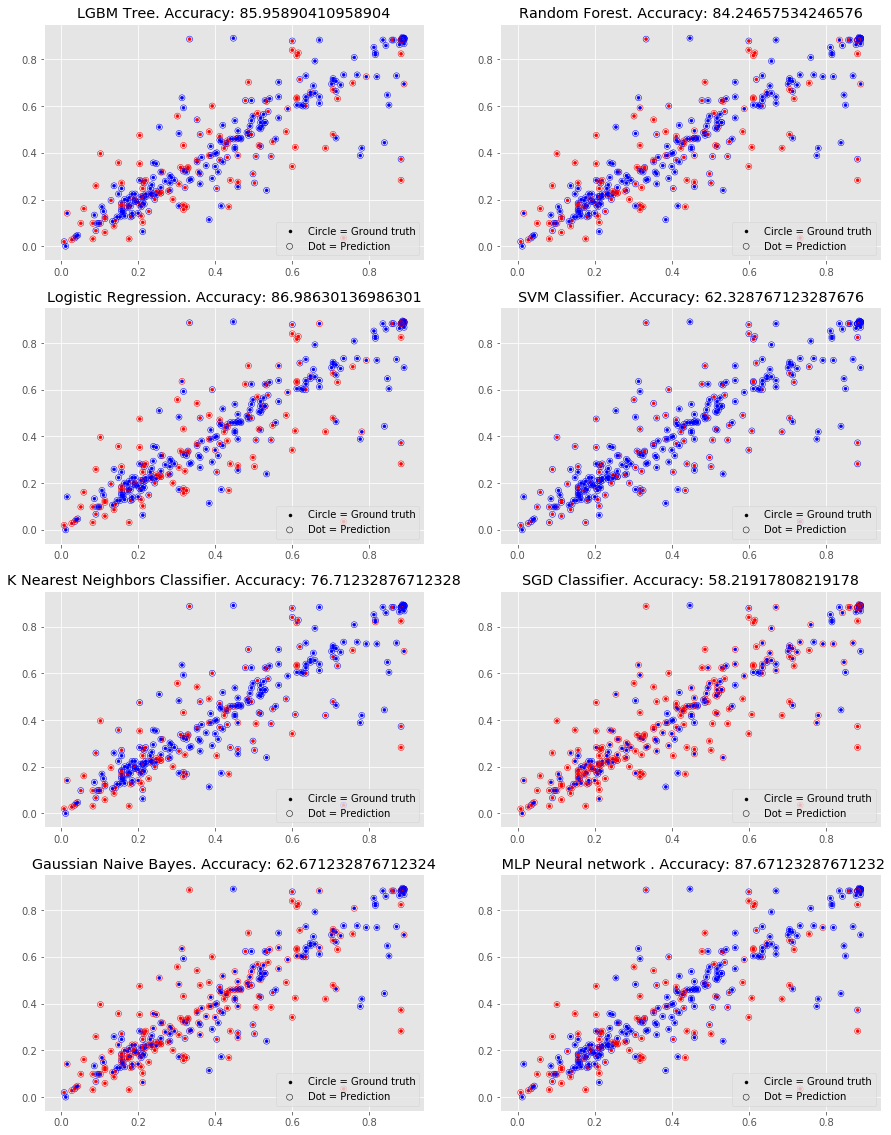

In [34]:
fig = plt.figure(figsize=(15,20))

#Decision Tree:

from lightgbm import LGBMClassifier

model = LGBMClassifier()
run_model(model, "LGBM Tree", 1)


# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=126)
run_model(model, "Random Forest", 2)

# ----- xgboost ------------


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
run_model(model, "Logistic Regression", 3)

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVM Classifier", 4)

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
run_model(model, "K Nearest Neighbors Classifier", 5)

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier", 6)

# --------- Gaussian Naive Bayes ---------
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
run_model(model, "Gaussian Naive Bayes", 7)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
run_model(model, " MLP Neural network ", 8)

### To check if the data is frequency based or not.

In [ ]:
train = df.copy()
train = np.fft.fft(train.loc[:, '1':'23040'])

In [ ]:
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(train_1.loc[:,'1':'23040'], label='1', color = 'red')
ax.plot(train_neg.loc[:, '1':'23040'], label='-1', color='blue')

Screen Shot 2019-11-02 at 8.18.33 PM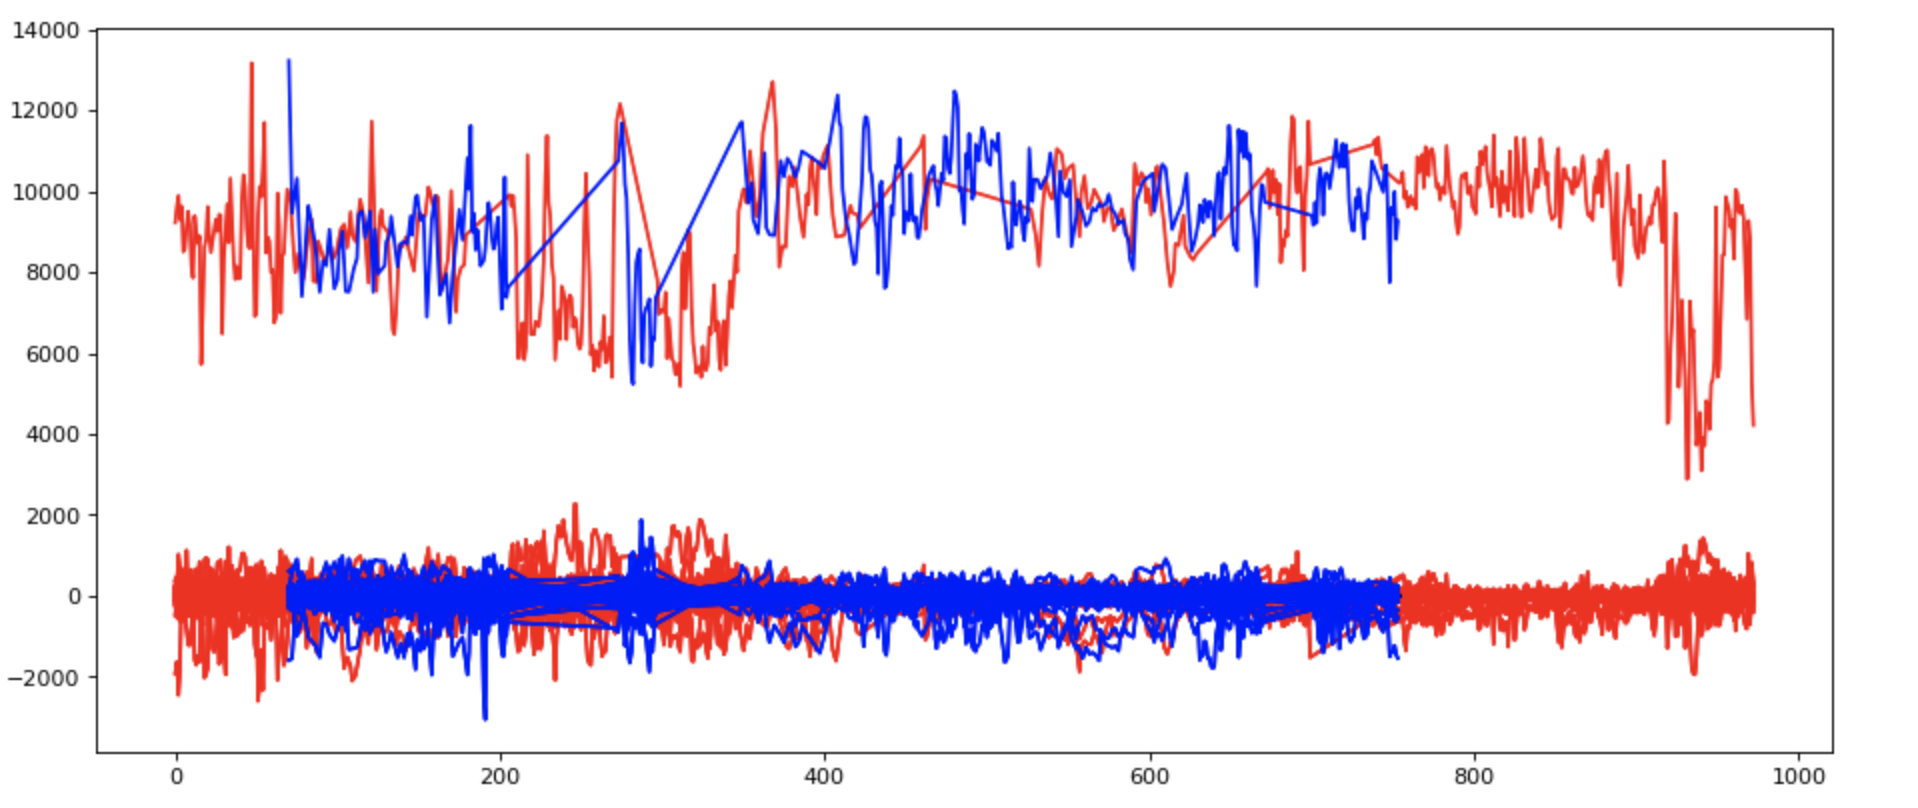

red is safe, blue is unsafe

The inference is that no relation can be found based on the frequency of the values

### Checking if the values have outliers, with k means clustering.

In [ ]:
X= data
distortions = []
for k in tqdm(range(2,30)):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.grid()
plt.title("Elbow Curve")

Screen Shot 2019-11-02 at 8.26.49 PM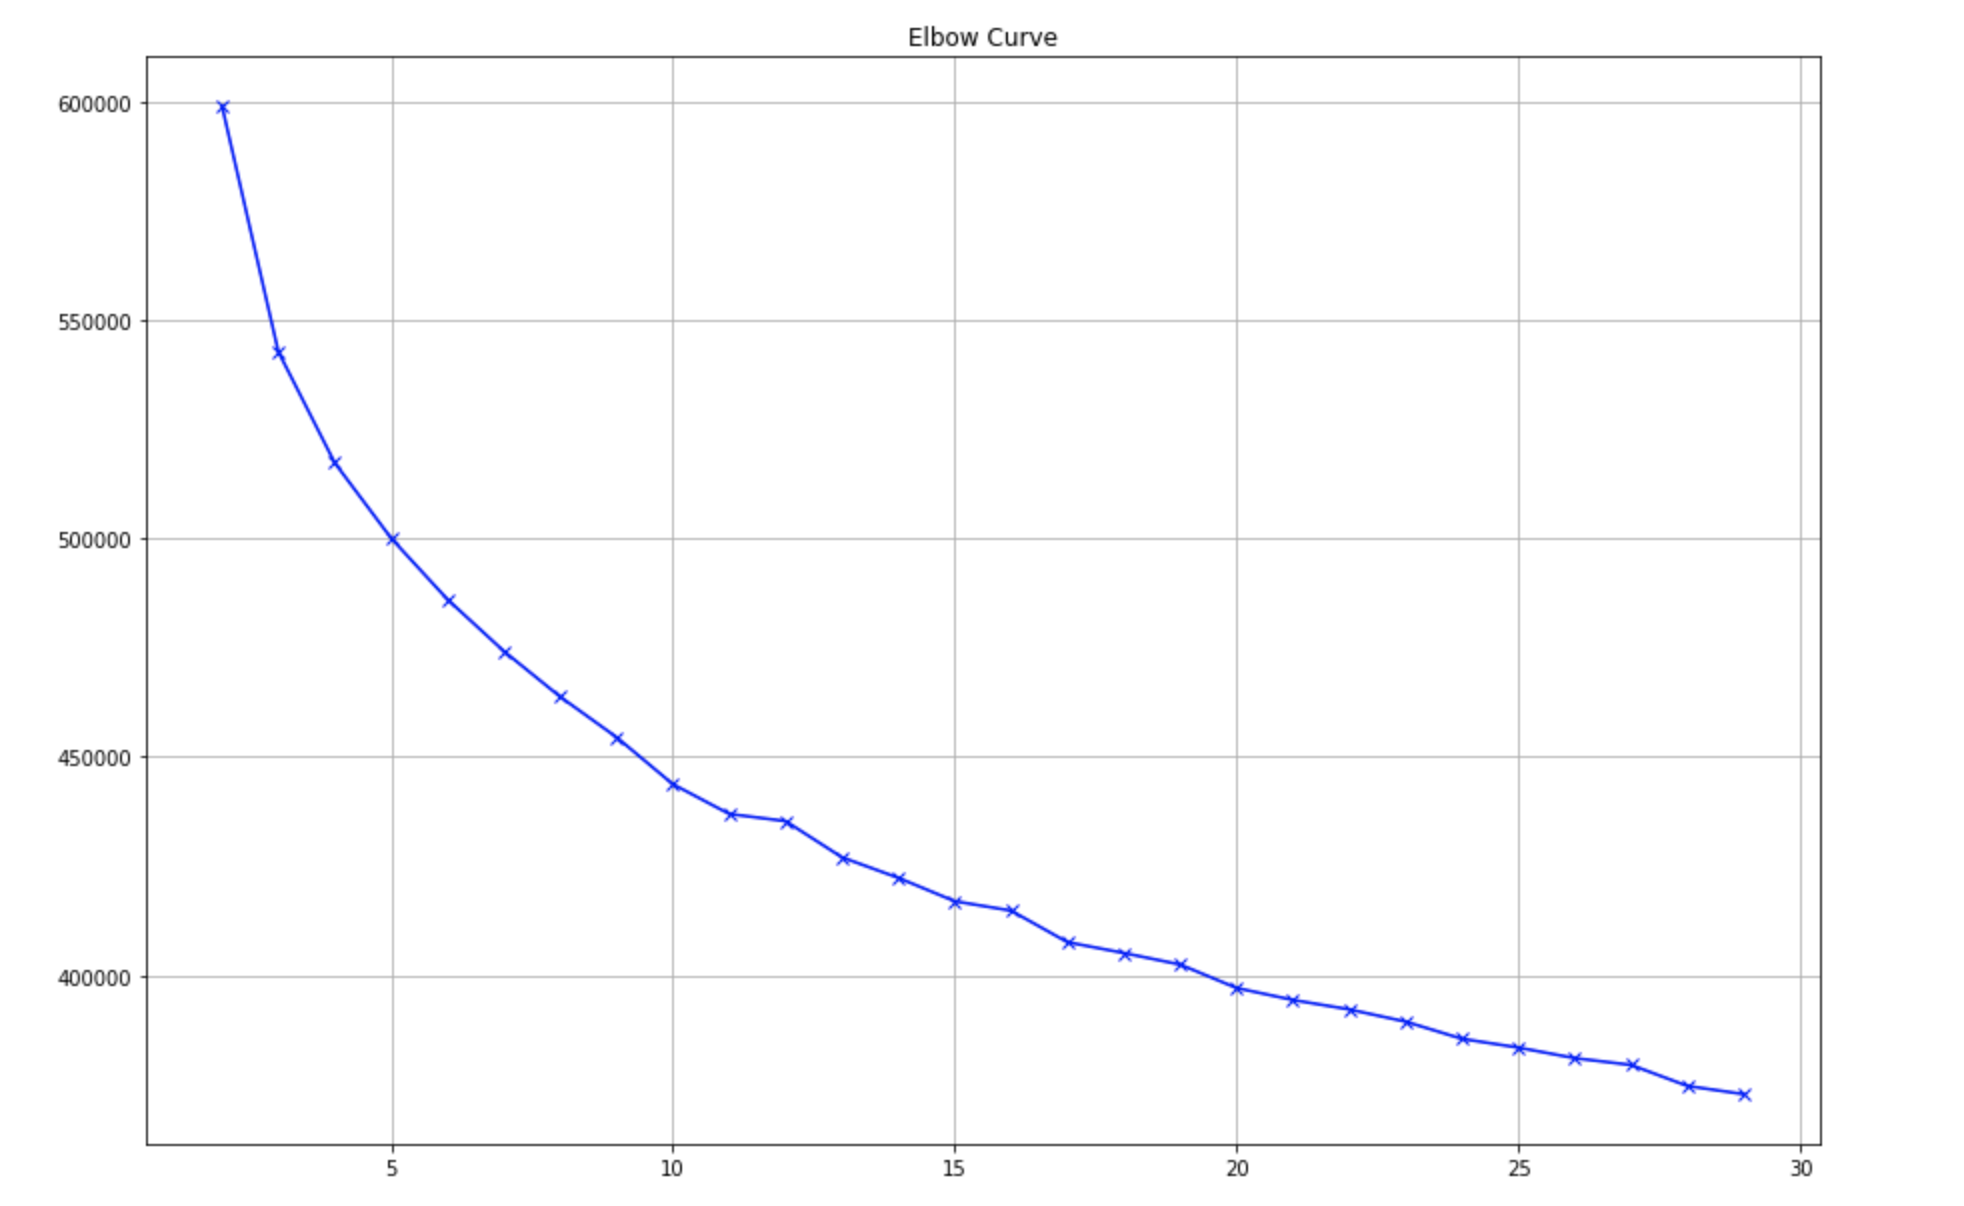

We can infer from the graph that when the number of clusters reaches 13 on the bottom axis, the reduction in SSE begins to slow down for each increase in cluster number. 

This leads to the conclusion that the optimal number of clusters would lie around the 13 mark

In [ ]:
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show

In [ ]:
#Computing K means with K = 8, thus, taking it as 8 clusters
centroids, _ = kmeans(data, 13)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

In [ ]:
# some plotting using numpy's logical indexing
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'ob',#blue circles
     data[idx==1,0],data[idx==1,1],'oy',#yellow circles
     data[idx==2,0],data[idx==2,1],'or', #red circles
     data[idx==3,0],data[idx==3,1],'og', #green circles
     data[idx==4,0],data[idx==4,1],'om',#magenta circles
     data[idx==5,0],data[idx ==5,1], 'oc',#cyan circles,
     data[idx==6,0],data[idx ==6,1], 'ok', #black cicrles 
     data[idx==7,0],data[idx ==7,1], '^r', #blue triangle
     data[idx==8,0],data[idx==8,1],'sr', #red circles
     data[idx==9,0],data[idx==9,1],'sy', #green circles
     data[idx==10,0],data[idx==10,1],'sm',#magenta circles
     data[idx==11,0],data[idx ==11,1], 'sc',#cyan circles,
     data[idx==12,0],data[idx ==12,1], 'sk', #black cicrles 
     data[idx==13,0],data[idx ==13,1], '^b', #red triangle
        
        
        
        
        )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=18, )

plt.show()

Screen Shot 2019-11-02 at 8.27.49 PM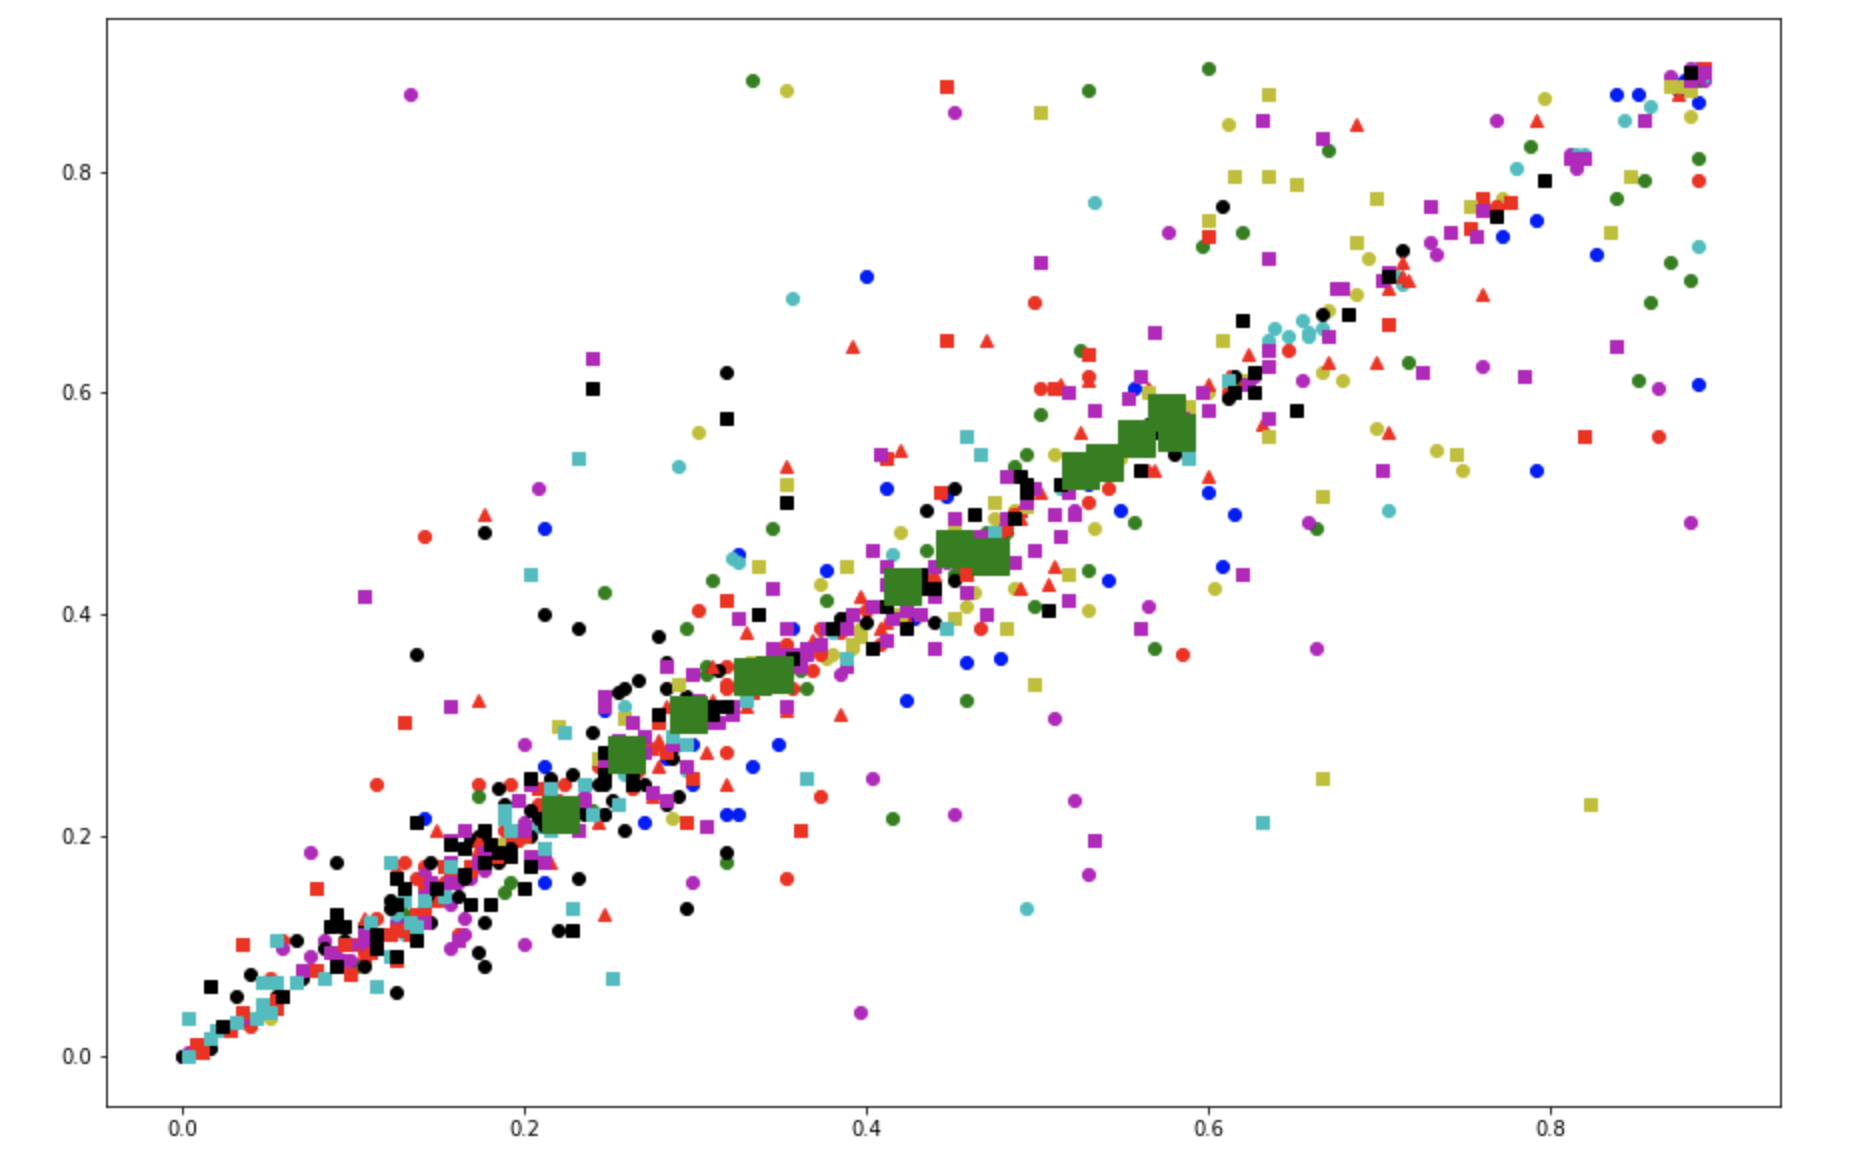

Apart from a from a few values, the rest of the values are linearly aligned amidst the clusters. 

### Selecting a few best features from chi2

In [152]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_cols = pd.DataFrame(X_train)  #independent columns
y_cols = pd.DataFrame(y_train).Label.values   #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=400)
fit = bestfeatures.fit(X_cols,y_cols)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_cols.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(200,'Score'))  #print 10 best features

     Specs      Score
2    22923  18.873368
1    22924  18.800774
0    22925  17.802792
10   22931  17.255472
52   22770  15.225064
..     ...        ...
233  11551   6.679226
322  11203   6.651342
486    417   6.630301
575    288   6.596457
638    259   6.573032

[200 rows x 2 columns]


In [154]:
featureScores.nlargest(70, 'Score').Specs.values

array([22923, 22924, 22925, 22931, 22770, 22771, 22930, 22763, 22982,
       22764, 22983, 22922, 22765, 22769, 22926, 22913, 22984, 22978,
       22981, 22985, 22977, 22979, 22935, 22986, 22936, 22973, 22987,
       22980, 22934, 22976, 22975, 22947, 22972, 22974, 22971, 22921,
       22776, 22822, 22970, 22988, 22775, 22823, 22989, 22958, 22938,
       22950, 22937, 22954, 22939, 22959, 22788, 22948, 22955, 22787,
       22957, 22969, 22790, 22821, 22818, 22956, 22933, 22817, 22949,
       22951, 22953, 22777, 22952, 22789, 22960, 22630])

In [144]:
X_train = pd.DataFrame(X_train)

In [145]:
X_train = X_train[[22925, 22924, 22923, 22982, 22983, 18603, 22926, 18763, 22984,
       22985, 22931, 22986, 22987, 22927, 18443, 18923, 22988, 22973,
       22989, 22974, 22972, 22975, 22978, 22981, 22977, 22971, 22979,
       22980, 22970, 22976, 22990, 22954, 22969, 22964, 22955, 22956,
       22930, 22966, 22965, 22935, 22957, 22962, 22968, 22963, 22953,
       22922, 22958, 22961, 22934, 22771, 22991, 22959, 22770, 22952,
       22960, 22936, 22947, 22950, 22951, 22933, 18283, 22948, 22823,
       22822, 22804, 22774, 19083, 22949, 22775, 22797, 22937, 22938,
       22802, 22806, 22992, 22776, 22939, 22798, 22765, 22801, 22790,
       22791, 22803, 22788, 22787, 22805, 22921, 19249, 22932, 22946,
       22766, 22796, 19248, 22800, 22799, 22810, 22809, 22789, 22767,
       22929, 19243, 22944, 22813, 22943, 22945, 22940, 19250, 22942,
       22808, 22941, 18123, 22811, 18610, 22777, 22812,  9008, 18767,
       18768, 22786, 19247, 19092, 22778, 22769, 22824, 19403, 19094,
       22764, 19093, 19251, 18770, 22814, 18611, 18924, 22792, 19557,
       22779, 18606, 22993, 22785, 22784, 18453, 18764, 18769, 18613,
       22763, 19556,  8373, 19091, 18765, 22781, 18612,  8372, 22928,
       11871, 12031, 22782, 22780, 22815, 19095, 22967, 19090, 12351,
       18451, 18766, 18771, 18446, 18609, 22773, 12672, 18450, 22793,
       11711, 12191, 12352, 12831, 22825, 22783,  8532, 18604, 22794,
        8533, 12671, 18291,  9009, 18293, 18444, 22826, 18452, 18292,
        8850,  8690, 11071, 22816, 12832, 18605,  8531, 22795, 11552,
       22817, 18925, 10441,  8849,  9965, 19089, 22994,  8693,  8536,
        8374, 18927,  9805,  7723, 22818, 11072, 10281, 19096,  8692,
        7725,  9011, 18607, 22827,  8848, 18454, 12192,  7724,  9010,
       22821, 10912, 18772, 11870, 18445,  9804, 11872, 19246, 11551,
       12511, 18930, 11710, 10440, 11230, 22920, 18929, 10600, 11712,
       18290, 10282, 19396, 18773, 10280, 22807,  7565, 18928, 18608,
        8530, 18294, 19244, 11070,  8371, 12512, 19252,  8696,  8534,
        9964, 22768, 22828,  7567, 22819, 11075, 22637, 18133, 18926,
       12992,  8537, 18132, 11568,  8535, 11874, 12032, 10605,  8691,
       22820, 11392, 22913,  9645, 11550,  8856, 12673, 22631, 12034,
       10122, 12354, 11043, 18762, 11873,   263, 11714, 12674,  8842,
       11876,  7564, 12033, 12030, 18456,  7727, 18614,  8204, 17478,
        9963, 13953,   102,  8055, 11231, 19088, 11713, 18448, 10445,
       12193, 22630, 12991, 11074, 18455,  8376, 22829, 11203, 10925,
       22638,  9806,  9014, 22772, 18931, 19097, 19404, 18932, 10911,
        8365,  8852,  8851,  9801, 17158, 19087,  8364, 22636,  7405,
       10437, 11390, 11553,   262,  8054,  7566, 11391, 18124,  8375,
       12353, 13634,  9485,  9015, 12833, 18602,  8378, 14113, 11234,
       16999, 10757,  7726, 18442, 11076,  9013,  7888, 22628,  7729,
       12645, 10452,  9800,  8854, 18295, 22629, 13474, 12514,  8689,
       12164, 13633,  9962, 18134,  8845,  8844, 18447,  9803,  9007,
       13793, 10293,  7889, 12194, 18457, 10125, 13795, 17638, 17000,
       11073, 22995,  8036, 19245, 14114, 12513, 13954,  9644,  8377,
       11409,   104,  9487,  8695, 11393,   416, 10442,  7730,  8697,
       10599, 13794, 22627,  8362,  9012, 11875, 10913, 14112,  9802,
       18296, 12035, 10121, 11728, 14749,  8685, 10932,  9168, 11554,
       10436,  8853,  9647, 13792, 18936, 17637, 19084, 12190,  8687,
       14589,  8857, 18284, 11394, 14590,  8214, 10453, 10915, 11077,
       10612, 13955, 10758,  9016, 14593,  9327, 13473, 18761,   264,
       10601, 13312, 17963, 18922,  8694, 18615,  9173, 12834, 11085,
       18297, 22642, 10277, 10420, 12515, 22639, 10598, 11877,  8202,
       10283,   252,  8686,  9005, 13952, 19253,  9628, 18131, 10916,
         417, 17159, 10439,  9966, 10427, 14592,  8538,  7890,  8529,
       10124, 22641,  8684, 10917,  8846,  7722, 13636, 18137,  7880,
       19555, 18135,  8215, 10587, 12195, 10765, 10118,  9169, 10276,
       10268, 18935, 18933,  7731, 11555,  9004, 10278,  7728, 12324,
       10123, 14274, 11715,  7891,  8213, 12526, 22646, 10428, 13635,
       10751, 17479,  8539,   103,  9484, 11569, 19713, 13472,  8847,
       10298, 17644,   269, 10924,  8527,  8217, 22640, 10771,  9001,
       22644, 13632, 18107, 12997, 12829,  7406,  7719,   260, 18934,
       11716, 10602,  9006, 11408, 11232, 12836, 13475, 10759,  9961,
         426, 18285, 10761, 22643, 18601,   428,  7885,   128,   288,
        9000,   256, 18114,  9486, 10928, 10120, 11237, 10447,  8048,
       10773, 16998, 19405,  9646, 10596,  8855, 12996, 11888,  8528,
          99, 16841, 13951, 22626, 17318, 11235, 10591, 14273, 11566,
       18937,  8841, 13309, 10772, 10883,  7407, 11413, 14594, 11236,
       12669, 11556, 14272, 11233, 11717, 10443,  8699,  9807, 22919,
       17797,  9309,  9328, 11410,  8056, 18449, 14748, 10438, 10752,
       17319, 12206,  9958, 19098, 17964,  8688,   257, 10588,   259,
       17317, 14115,  9332, 14753, 14107, 12355,  8525, 14434, 10133,
       10450, 11572, 17480,  7569, 12366, 10597,  8045, 14433, 17639,
       11397, 19408, 17804, 18921, 14750, 14591, 18288, 19397, 10614,
       11396, 18441,  9167,   108, 11886, 12036,  9166, 10613, 18289,
       10760, 10454, 10279, 12208,   419, 11092, 10290, 14111, 10774,
        8366, 10127, 11395,  9175, 18938, 10590,  8524, 12046, 10910,
       17795, 10769, 10446, 18760, 13152, 11094, 11573]]

In [146]:
X_test = pd.DataFrame(X_test)

In [147]:
X_test = X_test[[22925, 22924, 22923, 22982, 22983, 18603, 22926, 18763, 22984,
       22985, 22931, 22986, 22987, 22927, 18443, 18923, 22988, 22973,
       22989, 22974, 22972, 22975, 22978, 22981, 22977, 22971, 22979,
       22980, 22970, 22976, 22990, 22954, 22969, 22964, 22955, 22956,
       22930, 22966, 22965, 22935, 22957, 22962, 22968, 22963, 22953,
       22922, 22958, 22961, 22934, 22771, 22991, 22959, 22770, 22952,
       22960, 22936, 22947, 22950, 22951, 22933, 18283, 22948, 22823,
       22822, 22804, 22774, 19083, 22949, 22775, 22797, 22937, 22938,
       22802, 22806, 22992, 22776, 22939, 22798, 22765, 22801, 22790,
       22791, 22803, 22788, 22787, 22805, 22921, 19249, 22932, 22946,
       22766, 22796, 19248, 22800, 22799, 22810, 22809, 22789, 22767,
       22929, 19243, 22944, 22813, 22943, 22945, 22940, 19250, 22942,
       22808, 22941, 18123, 22811, 18610, 22777, 22812,  9008, 18767,
       18768, 22786, 19247, 19092, 22778, 22769, 22824, 19403, 19094,
       22764, 19093, 19251, 18770, 22814, 18611, 18924, 22792, 19557,
       22779, 18606, 22993, 22785, 22784, 18453, 18764, 18769, 18613,
       22763, 19556,  8373, 19091, 18765, 22781, 18612,  8372, 22928,
       11871, 12031, 22782, 22780, 22815, 19095, 22967, 19090, 12351,
       18451, 18766, 18771, 18446, 18609, 22773, 12672, 18450, 22793,
       11711, 12191, 12352, 12831, 22825, 22783,  8532, 18604, 22794,
        8533, 12671, 18291,  9009, 18293, 18444, 22826, 18452, 18292,
        8850,  8690, 11071, 22816, 12832, 18605,  8531, 22795, 11552,
       22817, 18925, 10441,  8849,  9965, 19089, 22994,  8693,  8536,
        8374, 18927,  9805,  7723, 22818, 11072, 10281, 19096,  8692,
        7725,  9011, 18607, 22827,  8848, 18454, 12192,  7724,  9010,
       22821, 10912, 18772, 11870, 18445,  9804, 11872, 19246, 11551,
       12511, 18930, 11710, 10440, 11230, 22920, 18929, 10600, 11712,
       18290, 10282, 19396, 18773, 10280, 22807,  7565, 18928, 18608,
        8530, 18294, 19244, 11070,  8371, 12512, 19252,  8696,  8534,
        9964, 22768, 22828,  7567, 22819, 11075, 22637, 18133, 18926,
       12992,  8537, 18132, 11568,  8535, 11874, 12032, 10605,  8691,
       22820, 11392, 22913,  9645, 11550,  8856, 12673, 22631, 12034,
       10122, 12354, 11043, 18762, 11873,   263, 11714, 12674,  8842,
       11876,  7564, 12033, 12030, 18456,  7727, 18614,  8204, 17478,
        9963, 13953,   102,  8055, 11231, 19088, 11713, 18448, 10445,
       12193, 22630, 12991, 11074, 18455,  8376, 22829, 11203, 10925,
       22638,  9806,  9014, 22772, 18931, 19097, 19404, 18932, 10911,
        8365,  8852,  8851,  9801, 17158, 19087,  8364, 22636,  7405,
       10437, 11390, 11553,   262,  8054,  7566, 11391, 18124,  8375,
       12353, 13634,  9485,  9015, 12833, 18602,  8378, 14113, 11234,
       16999, 10757,  7726, 18442, 11076,  9013,  7888, 22628,  7729,
       12645, 10452,  9800,  8854, 18295, 22629, 13474, 12514,  8689,
       12164, 13633,  9962, 18134,  8845,  8844, 18447,  9803,  9007,
       13793, 10293,  7889, 12194, 18457, 10125, 13795, 17638, 17000,
       11073, 22995,  8036, 19245, 14114, 12513, 13954,  9644,  8377,
       11409,   104,  9487,  8695, 11393,   416, 10442,  7730,  8697,
       10599, 13794, 22627,  8362,  9012, 11875, 10913, 14112,  9802,
       18296, 12035, 10121, 11728, 14749,  8685, 10932,  9168, 11554,
       10436,  8853,  9647, 13792, 18936, 17637, 19084, 12190,  8687,
       14589,  8857, 18284, 11394, 14590,  8214, 10453, 10915, 11077,
       10612, 13955, 10758,  9016, 14593,  9327, 13473, 18761,   264,
       10601, 13312, 17963, 18922,  8694, 18615,  9173, 12834, 11085,
       18297, 22642, 10277, 10420, 12515, 22639, 10598, 11877,  8202,
       10283,   252,  8686,  9005, 13952, 19253,  9628, 18131, 10916,
         417, 17159, 10439,  9966, 10427, 14592,  8538,  7890,  8529,
       10124, 22641,  8684, 10917,  8846,  7722, 13636, 18137,  7880,
       19555, 18135,  8215, 10587, 12195, 10765, 10118,  9169, 10276,
       10268, 18935, 18933,  7731, 11555,  9004, 10278,  7728, 12324,
       10123, 14274, 11715,  7891,  8213, 12526, 22646, 10428, 13635,
       10751, 17479,  8539,   103,  9484, 11569, 19713, 13472,  8847,
       10298, 17644,   269, 10924,  8527,  8217, 22640, 10771,  9001,
       22644, 13632, 18107, 12997, 12829,  7406,  7719,   260, 18934,
       11716, 10602,  9006, 11408, 11232, 12836, 13475, 10759,  9961,
         426, 18285, 10761, 22643, 18601,   428,  7885,   128,   288,
        9000,   256, 18114,  9486, 10928, 10120, 11237, 10447,  8048,
       10773, 16998, 19405,  9646, 10596,  8855, 12996, 11888,  8528,
          99, 16841, 13951, 22626, 17318, 11235, 10591, 14273, 11566,
       18937,  8841, 13309, 10772, 10883,  7407, 11413, 14594, 11236,
       12669, 11556, 14272, 11233, 11717, 10443,  8699,  9807, 22919,
       17797,  9309,  9328, 11410,  8056, 18449, 14748, 10438, 10752,
       17319, 12206,  9958, 19098, 17964,  8688,   257, 10588,   259,
       17317, 14115,  9332, 14753, 14107, 12355,  8525, 14434, 10133,
       10450, 11572, 17480,  7569, 12366, 10597,  8045, 14433, 17639,
       11397, 19408, 17804, 18921, 14750, 14591, 18288, 19397, 10614,
       11396, 18441,  9167,   108, 11886, 12036,  9166, 10613, 18289,
       10760, 10454, 10279, 12208,   419, 11092, 10290, 14111, 10774,
        8366, 10127, 11395,  9175, 18938, 10590,  8524, 12046, 10910,
       17795, 10769, 10446, 18760, 13152, 11094, 11573]]

In [150]:
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.783581292461626,
               max_depth=7, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1778, n_jobs=-1, num_leaves=169,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [151]:
accuracy_score(y_test, model.predict(X_test))

0.4342105263157895

Thus, we notice that the accuracy has dropped down.

### Applying PCA to reduce features

In [38]:
X_large = traindf_large.drop('Label', axis=1)
y_large = traindf_large.Label.values

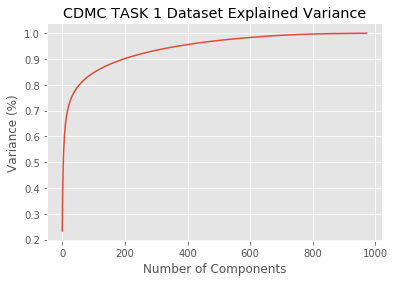

In [40]:
pca = decomposition.PCA().fit(X_large)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('CDMC TASK 1 Dataset Explained Variance')
plt.show()

We can notice, that around 700 features, 99% of the variance is retained for each component, so let's try with that

In [41]:

X_reduced_pca = decomposition.PCA(n_components=700).fit_transform(X_large)

In [42]:
trial_pca = pd.DataFrame(X_reduced_pca)
trial_pca['Label'] = y_large

In [43]:
model = LGBMClassifier()

In [46]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8595890410958904

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.45      0.88      0.59        48
           1       0.97      0.79      0.87       244

    accuracy                           0.80       292
   macro avg       0.71      0.83      0.73       292
weighted avg       0.88      0.80      0.82       292



In [93]:
train_set, test_set= np.split(trial_pca, [int(.7 *len(trial_pca))])

X_train, y_train = train_set.drop('Label', axis=1).values, train_set.Label
X_test, y_test = test_set.drop('Label', axis=1).values, test_set.Label

### Applying hyperopt to lightgbm

In [70]:
from lightgbm import LGBMClassifier
from hyperopt import fmin, tpe, hp, anneal, Trials

In [64]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:

def gb_mse_cv_LGB(params, random_state=random_state, cv=kf, X=x_train_trans_without, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'learning_rate': params['learning_rate'],
              'num_leaves': int(params['num_leaves']),
                'min_child_samples': int(params['min_child_samples']),
              'reg_alpha': params['reg_alpha'],
              'reg_lambda': params['reg_lambda'],
              'subsample_freq': int(params['subsample_freq']),
              'subsample': params['subsample']
              
             }
    
    # we use this params to create a new LGBM Regressor
    model = LGBMClassifier(random_state=random_state, **params,)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="accuracy", n_jobs=-1).mean()

    return score



In [ ]:
space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
       'max_depth' : hp.quniform('max_depth', 2, 25, 1),
       'learning_rate': hp.loguniform('learning_rate',-5 , 4),
       'num_leaves': hp.quniform('num_leaves', 11, 450,1),
    'min_child_samples': hp.quniform('min_child_samples', 10, 40, 1),
      'reg_alpha': hp.loguniform('reg_alpha', 0, 4),
       'reg_lambda':hp.loguniform('reg_lambda', 0, 4),
      'subsample_freq': hp.quniform('subsample_freq', 2, 20, 1),
      'subsample': hp.quniform('subsample', 0, 1, 0.1)
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv_LGB, # function to optimize
           space=space, 
           algo=anneal.suggest, # optimization algorithm, hyperotp will select its parameters automatically
           max_evals=n_iter, # maximum number of iterations
           trials=trials, # logging
           rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = LGBMClassifier(random_state=random_state, n_estimators=int(best['n_estimators']),
                      max_depth=int(best['max_depth']),learning_rate=best['learning_rate'],
                      num_leaves=int(best['num_leaves']), min_child_samples=int(best['min_child_samples']),
                         reg_lambda=best['reg_lambda'], reg_alpha=best['reg_alpha'], subsample=best['subsample'], 
                       subsample_freq=int(best['subsample_freq'])
                      )
model.fit(x_train_trans_without,y_train)
# tpe_test_score=accuracy_score(y_test, model.predict(X_test_trans))
# print(tpe_test_score)

In [283]:
y_pred = lgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.8871794871794871

Screen Shot 2019-10-31 at 3.19.39 PM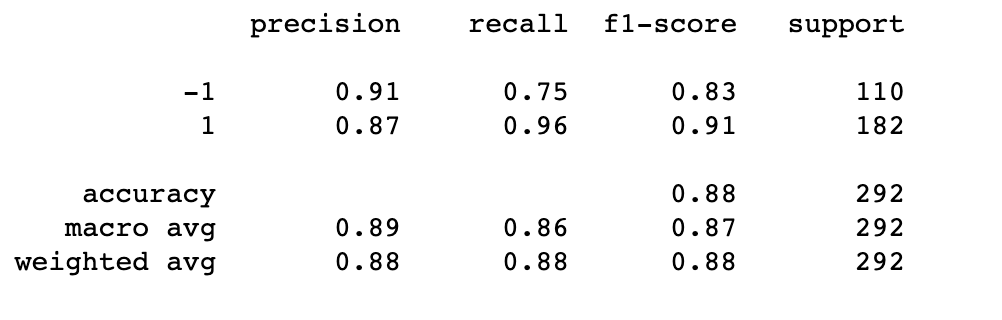